# Health expenditure by sources of funding

https://www.destatis.de/EN/Themes/Society-Environment/Health/Health-Expenditure/Tables/sources-of-funding.html

# Import Modules

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [20, 18]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                                      # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Health/Health-Expenditure/Tables/sources-of-funding.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
tbody = soup.find('tbody')
trs = tbody.findAll('tr')


spec = []
yr_2018 = []
yr_2019 = []
yr_2020 = []
yr_2021 = []


for tr in trs:
  spec.append(tr.find_all('td', rowspan=1)[0].string)
  yr_2018.append(tr.find_all('td', rowspan=1)[1].string)
  yr_2019.append(tr.find_all('td', rowspan=1)[2].string)
  yr_2020.append(tr.find_all('td', rowspan=1)[3].string)
  yr_2021.append(tr.find_all('td', rowspan=1)[4].string)

# Create Dataframe

In [6]:
data = {
    'Specification': spec,
    'Year_2018': yr_2018,
    'Year_2019': yr_2019,
    'Year_2020': yr_2020,
    'Year_2021': yr_2021
}

df = pd.DataFrame(data=data)

# Head and Tail

In [7]:
df

,Specification,Year_2018,Year_2019,Year_2020,Year_2021
0,total expenditure on health,"393,094","413,805","440,575","465,707"
1,general government excluding social security f...,"16,894","17,730","30,747","37,246"
2,statutory health insurance,"222,090","233,018","241,491","254,778"
3,social long-term care insurance,"39,529","42,124","47,183","51,629"
4,statutory pension insurance,"4,880","5,027","4,764","5,060"
5,statutory accident insurance,"6,006","6,378","6,247","6,218"
6,private health insurance,"33,253","34,632","35,406","36,121"
7,employers,"16,364","17,236","17,614","18,006"
8,private households/ private non-profit organis...,"54,078","57,660","57,125","56,649"


In [8]:
df.shape

(9, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Specification  9 non-null      object
 1   Year_2018      9 non-null      object
 2   Year_2019      9 non-null      object
 3   Year_2020      9 non-null      object
 4   Year_2021      9 non-null      object
dtypes: object(5)
memory usage: 488.0+ bytes


In [10]:
df = df.applymap(lambda x: str.strip(x).replace(',', ''))               # strip whitespaces and replace commas with nothing
df

,Specification,Year_2018,Year_2019,Year_2020,Year_2021
0,total expenditure on health,393094,413805,440575,465707
1,general government excluding social security f...,16894,17730,30747,37246
2,statutory health insurance,222090,233018,241491,254778
3,social long-term care insurance,39529,42124,47183,51629
4,statutory pension insurance,4880,5027,4764,5060
5,statutory accident insurance,6006,6378,6247,6218
6,private health insurance,33253,34632,35406,36121
7,employers,16364,17236,17614,18006
8,private households/ private non-profit organis...,54078,57660,57125,56649


In [11]:
df = df.astype(
  {
    'Year_2018': np.int64,
    'Year_2019': np.int64,
    'Year_2020':	np.int64,
    'Year_2021': np.int64
  }
)

df.dtypes

Specification    object
Year_2018         int64
Year_2019         int64
Year_2020         int64
Year_2021         int64
dtype: object

In [12]:
df.drop(columns=['Specification']).describe()

,Year_2018,Year_2019,Year_2020,Year_2021
count,9.000000,9.000000,9.000000,9.000000
mean,87354.222222,91956.666667,97905.777778,103490.444444
std,132935.993893,139822.912133,147569.813760,155867.542913
min,4880.000000,5027.000000,4764.000000,5060.000000
25%,16364.000000,17236.000000,17614.000000,18006.000000
50%,33253.000000,34632.000000,35406.000000,37246.000000
75%,54078.000000,57660.000000,57125.000000,56649.000000
max,393094.000000,413805.000000,440575.000000,465707.000000


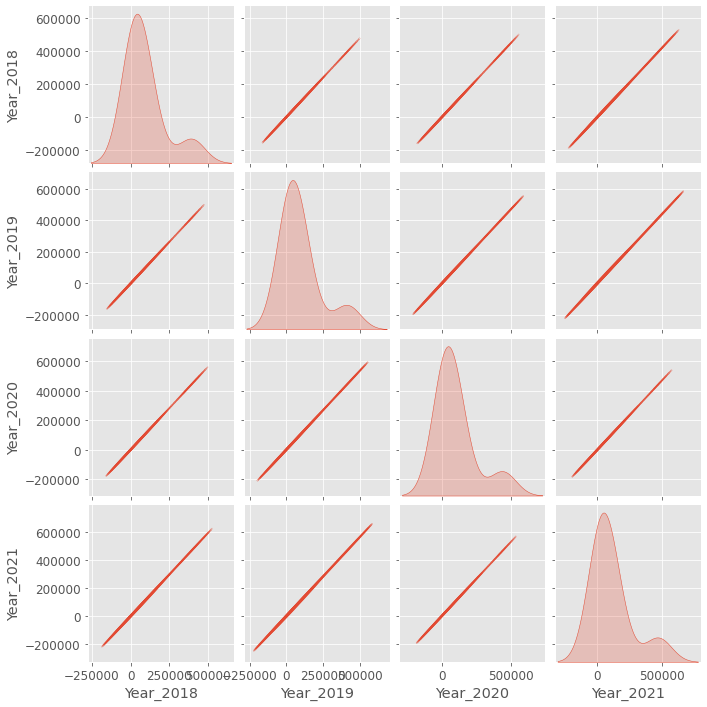

In [13]:
sns.pairplot(df.drop(columns=['Specification']).describe(), kind='kde')

# Data Visualization

In [14]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def million(x, pos):
  return ' €%1.1fM' % (x * 1e-3)

format_mill = FuncFormatter(million)

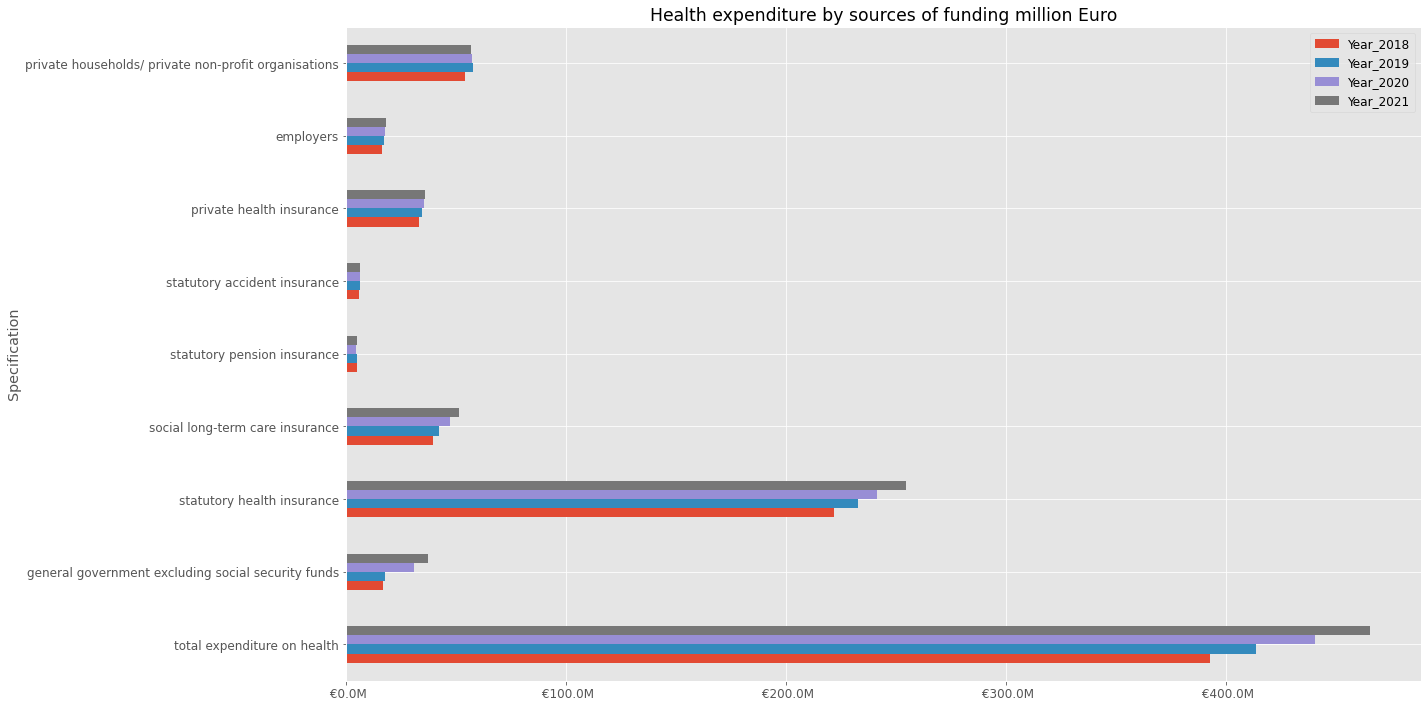

In [15]:
ax = df.set_index('Specification').plot(kind='barh', figsize=(20, 10))
ax.set(title='Health expenditure by sources of funding million Euro')
ax.xaxis.set_major_formatter(format_mill)